##### About Dataset

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./archive/loan_approval_dataset.csv")

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.drop("loan_id", axis=1, inplace=True)

In [5]:
df.isna().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [8]:
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        df[label + "_Encoded"] = encoder.fit_transform(df[label])
        df.drop(label, axis=1, inplace=True)

In [9]:
df.dtypes

 no_of_dependents            int64
 income_annum                int64
 loan_amount                 int64
 loan_term                   int64
 cibil_score                 int64
 residential_assets_value    int64
 commercial_assets_value     int64
 luxury_assets_value         int64
 bank_asset_value            int64
 education_Encoded           int32
 self_employed_Encoded       int32
 loan_status_Encoded         int32
dtype: object

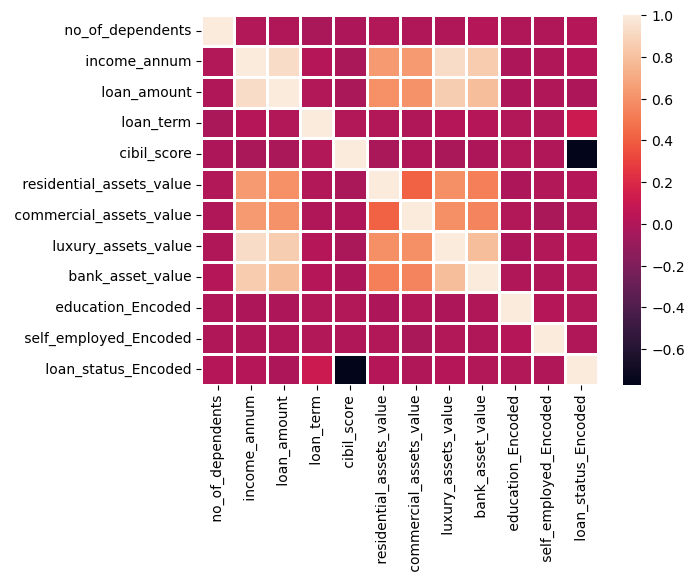

In [10]:
sn.heatmap(df.corr(), linewidths=1);

In [11]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Encoded,self_employed_Encoded,loan_status_Encoded
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1
